In [133]:
import asammdf
import numpy as np

In [134]:
import py.path

In [135]:
import get_files

In [136]:
help(get_files.get_files)

Help on function get_files in module get_files:

get_files(directory='.', extensions=None, depth=None, absolute=True)
    Args:
        directory (Optional[str]): Starting directory.
                Default: ```os.path.curdir```
        extensions (Optional[str]): List of extensions to yield
                Case insensitive. ('.JPG' and '.jpg' are equivalent)
                Default: None (All files).
        depth (Optional[int]): Depth to recurse to.
                Default: None (Infinite depth)
        absolute (Optional[bool]): Return absolue path
                Default: True
    
    Yields:
        str: List of all files found in ``directory``
    
    Raises:
        FileNotFoundError: If ```directory``` does not exist



In [137]:
mdfs = get_files.get_files(
    directory='.',
    extensions=".mf4",
    depth=2,
    absolute=True
)

In [138]:
for mdf in mdfs:
    break
mdf

'/projects/RaspberryMDF/DevNotebooks/Data/4410e3a7-adc9-4eed-ba64-38303447175c.mf4'

In [139]:
mdf_ = asammdf.MDF(mdf)

In [140]:
mdf_.version

'4.11'

In [141]:
def __repr__(self):
    return "MDF<{}>".format(self.version)

In [142]:
def _path(self):
    return py.path.local(self._file.name)

In [143]:
_path(mdf_)

local('/projects/RaspberryMDF/DevNotebooks/Data/4410e3a7-adc9-4eed-ba64-38303447175c.mf4')

In [144]:
_path(mdf_).basename

'4410e3a7-adc9-4eed-ba64-38303447175c.mf4'

In [145]:
extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}

In [146]:
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

In [147]:
mdf_ = MDF2(mdf)
mdf_

MDF<4.11>

In [148]:
def _path(self):
    return py.path.local(self._file.name)

def __repr__(self):
    return "MDF<{}, v={}>".format(self._path.basename, self.version)

extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

mdf_ = MDF2(mdf)
mdf_

MDF<4410e3a7-adc9-4eed-ba64-38303447175c.mf4, v=4.11>

In [149]:
mdf_.channels_db

{'sine': [(0, 1)], 't': [(0, 0)]}

In [150]:
mdf_

MDF<4410e3a7-adc9-4eed-ba64-38303447175c.mf4, v=4.11>

In [151]:
help(mdf_.get)

Help on method get in module asammdf.mdf_v4:

get(name=None, group=None, index=None, raster=None, samples_only=False, data=None, raw=False) method of asammdf.mdf_v4.MDF4 instance
    Gets channel samples.
    Channel can be specified in two ways:
    
    * using the first positional argument *name*
    
        * if there are multiple occurances for this channel then the
          *group* and *index* arguments can be used to select a specific
          group.
        * if there are multiple occurances for this channel and either the
          *group* or *index* arguments is None then a warning is issued
    
    * using the group number (keyword argument *group*) and the channel
      number (keyword argument *index*). Use *info* method for group and
      channel numbers
    
    If the *raster* keyword argument is not *None* the output is
    interpolated accordingly
    
    Parameters
    ----------
    name : string
        name of channel
    group : int
        0-based group in

In [152]:
sine = mdf_.get("sine")

In [153]:
mdf_.sine

AttributeError: 'MDF2' object has no attribute 'sine'

In [154]:
setattr(mdf_, "sine", mdf_.get("sine"))

In [155]:
mdf_.sine

Signal(name=sine, samples=array([ 0.0000000e+00, -8.7422777e-08,  1.7484555e-07, -2.3849761e-08,
        3.4969111e-07, -6.7553248e-07,  4.7699523e-08, -1.3272152e-06,
        6.9938221e-07, -7.1549280e-08,  1.3510650e-06, -2.6305806e-06,
        9.5399045e-08, -1.3749147e-06,  2.6544303e-06, -1.1924881e-07,
        1.3987644e-06, -2.6782802e-06,  1.4309856e-07, -1.4226142e-06],
      dtype=float32), timestamps=array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]), unit=, conversion=None, comment=, raw=False)

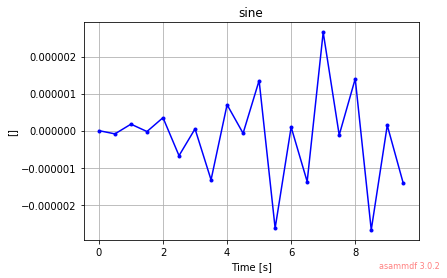

In [156]:
mdf_.sine.plot()

In [157]:
%matplotlib inline

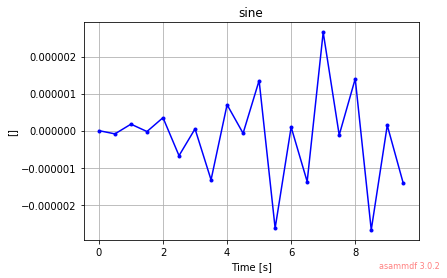

In [158]:
mdf_.sine.plot()

In [159]:
mdf_.sine.timestamps

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [160]:
mdf_.sine.samples

array([ 0.0000000e+00, -8.7422777e-08,  1.7484555e-07, -2.3849761e-08,
        3.4969111e-07, -6.7553248e-07,  4.7699523e-08, -1.3272152e-06,
        6.9938221e-07, -7.1549280e-08,  1.3510650e-06, -2.6305806e-06,
        9.5399045e-08, -1.3749147e-06,  2.6544303e-06, -1.1924881e-07,
        1.3987644e-06, -2.6782802e-06,  1.4309856e-07, -1.4226142e-06],
      dtype=float32)

In [161]:
mdf_.sine

Signal(name=sine, samples=array([ 0.0000000e+00, -8.7422777e-08,  1.7484555e-07, -2.3849761e-08,
        3.4969111e-07, -6.7553248e-07,  4.7699523e-08, -1.3272152e-06,
        6.9938221e-07, -7.1549280e-08,  1.3510650e-06, -2.6305806e-06,
        9.5399045e-08, -1.3749147e-06,  2.6544303e-06, -1.1924881e-07,
        1.3987644e-06, -2.6782802e-06,  1.4309856e-07, -1.4226142e-06],
      dtype=float32), timestamps=array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]), unit=, conversion=None, comment=, raw=False)

In [162]:
help(mdf_.extend)

Help on method extend in module asammdf.mdf_v4:

extend(index, signals) method of asammdf.mdf_v4.MDF4 instance
    Extend a group with new samples. The first signal is the master channel's samples, and the
    next signals must respect the same order in which they were appended. The samples must have raw
    or physical values according to the *Signals* used for the initial append.
    
    Parameters
    ----------
    index : int
        group index
    signals : list
        list on numpy.ndarray objects
    
    Examples
    --------
    >>> # case 1 conversion type None
    >>> s1 = np.array([1, 2, 3, 4, 5])
    >>> s2 = np.array([-1, -2, -3, -4, -5])
    >>> s3 = np.array([0.1, 0.04, 0.09, 0.16, 0.25])
    >>> t = np.array([0.001, 0.002, 0.003, 0.004, 0.005])
    >>> names = ['Positive', 'Negative', 'Float']
    >>> units = ['+', '-', '.f']
    >>> s1 = Signal(samples=s1, timstamps=t, unit='+', name='Positive')
    >>> s2 = Signal(samples=s2, timstamps=t, unit='-', name='Negative

In [125]:
sine

Signal(name=sine, samples=array([ 0.0000000e+00, -8.7422777e-08,  1.7484555e-07, -2.3849761e-08,
        3.4969111e-07, -6.7553248e-07,  4.7699523e-08, -1.3272152e-06,
        6.9938221e-07, -7.1549280e-08,  1.3510650e-06, -2.6305806e-06,
        9.5399045e-08, -1.3749147e-06,  2.6544303e-06, -1.1924881e-07,
        1.3987644e-06, -2.6782802e-06,  1.4309856e-07, -1.4226142e-06],
      dtype=float32), timestamps=array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]), unit=, conversion=None, comment=, raw=False)

In [163]:
type(sine.timestamps)

numpy.ndarray

In [164]:
np.append(sine.timestamps, [10, 11])

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 11. ])

In [169]:
tf=10
t0=np.arange(0, tf, 1e-3, dtype=np.float32)
t1=np.arange(tf, 2*tf, 1e-3, dtype=np.float32)

In [170]:
t0

array([0.000000e+00, 1.000000e-03, 2.000000e-03, ..., 9.997001e+00,
       9.998000e+00, 9.999001e+00], dtype=float32)

In [172]:
t1

array([10.      , 10.001   , 10.002001, ..., 20.001041, 20.002043,
       20.003044], dtype=float32)

In [173]:
def sine(t, A=1, f=1):
    sine_ = A*np.sin(
        2 * np.pi * f * t
    )
    return sine_